In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [2]:
data = pd.read_csv(r"C:\Users\lenovo\Desktop\Thesis\Dataset final\suicide_dataset_numeric.csv")


In [3]:
data

,attempt_suicide,Age_group,Gender,Marital_status,Occupation,Problem_with_family,Marital_dissatisfaction,Relationship_problem,Unexpected_result_or_failed in exam,Sexual_harassment,financial_constraint,Problem_in_workspace,Victim_of_domestic_violation,Chronic_physical_illness,Depressed,Struggled_with_dept,Mentall_illness_apart_from depression,Not_getting_job,False_allegation,Age
0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20
1,0,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
2,1,4,1,1,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,35
3,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,22
4,1,2,0,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,2,0,0,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,18
422,0,4,1,1,2,1,0,0,1,0,1,0,0,0,1,1,1,0,1,39
423,0,2,1,1,2,0,0,0,1,0,1,0,1,0,1,0,0,0,0,19
424,1,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,14


In [4]:

features = data.columns
features

Index(['attempt_suicide', 'Age_group', 'Gender', 'Marital_status',
       'Occupation', 'Problem_with_family', 'Marital_dissatisfaction',
       'Relationship_problem', 'Unexpected_result_or_failed in exam',
       'Sexual_harassment', 'financial_constraint', 'Problem_in_workspace',
       'Victim_of_domestic_violation', 'Chronic_physical_illness', 'Depressed',
       'Struggled_with_dept', 'Mentall_illness_apart_from depression',
       'Not_getting_job', 'False_allegation', 'Age'],
      dtype='object')

In [28]:
features = [x for x in features if x != 'attempt_suicide' and x!= 'Age']
features
X_data = data[features]
Y_data = data['attempt_suicide']

In [29]:
train, test = train_test_split(data, test_size = 0.3)
print(len(data))
print(len(train))
print(len(test))

426
298
128


In [30]:
x_train = train[features]
y_train = train["attempt_suicide"]

x_test = test[features]
y_test = test["attempt_suicide"]

In [31]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
clf = RandomForestClassifier(n_estimators=101,criterion='gini')

trained_model = clf.fit(x_train, y_train)
trained_model.fit(x_train, y_train)
predictions = trained_model.predict(x_test)      

Train_Accuracy = accuracy_score(y_train, trained_model.predict(x_train))
Test_Accuracy = accuracy_score(y_test, predictions)
score = confusion_matrix(y_test, predictions)
print(Train_Accuracy)
print(Test_Accuracy)
print(score)



0.9798657718120806
0.875
[[84  0]
 [16 28]]


In [32]:
Rf = RandomForestClassifier(n_estimators=101,random_state=42 )

In [33]:

Rf = Rf.fit(x_train,y_train)

In [34]:
y_pred=Rf.predict(x_test)

In [35]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random forest: ", round(score, 1), "%" )
from sklearn.metrics import plot_confusion_matrix

Accuracy using Random forest:  85.9 %


In [37]:
confusion_matrix(y_test, y_pred)

array([[82,  2],
       [16, 28]], dtype=int64)

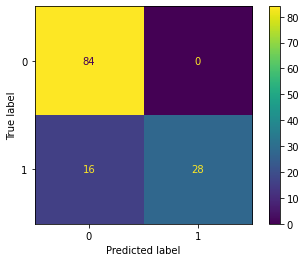

In [38]:
matrix = plot_confusion_matrix(clf,x_test,y_test)


In [39]:
#code for cross validation start here
from sklearn.model_selection import cross_val_score

In [83]:
scores=cross_val_score(RandomForestClassifier(n_estimators=101),X_data,Y_data,cv=10)
aveagerandomfscore = np.average(scores)
print(f"Individual fold accuracy score(RF):{scores}")
print(f"RF(avearage): {aveagerandomfscore}")

Individual fold accuracy score(RF):[0.76744186 0.90697674 0.86046512 0.86046512 0.88372093 0.74418605
 0.88095238 0.85714286 0.83333333 0.85714286]
RF(avearage): 0.8451827242524917


In [48]:
from sklearn.svm import SVC

In [79]:
scoressvm = cross_val_score(SVC(gamma='auto'), X_data,Y_data,cv=10)
averagesvmscore = np.average(scoressvm)
print(f"Individual fold accuracy score(SVM):{scoressvm}")
print(f"Svm(avearage): {averagesvmscore}")

Individual fold accuracy score(SVM):[0.69767442 0.88372093 0.86046512 0.76744186 0.79069767 0.74418605
 0.76190476 0.80952381 0.80952381 0.76190476]
Svm(avearage): 0.7887043189368771


In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [78]:
scoresann=cross_val_score(MLPClassifier(random_state=0,max_iter=500),X_data,Y_data,cv=10)
print(scoresann)
scoreavg = np.average(scoresann)
print(scoreavg)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: Convergen

[0.76744186 0.90697674 0.86046512 0.81395349 0.74418605 0.74418605
 0.83333333 0.83333333 0.88095238 0.83333333]
0.8218161683277962


c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nbscore =cross_val_score(GaussianNB(), X_data,Y_data,cv=10)


In [61]:
np.average(nbscore)

0.628737541528239